<a href="https://colab.research.google.com/github/SavantLogics/SavantLogics/blob/main/bivariate_videogame_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import io
import seaborn as sns
from scipy import stats
from google.colab import files
from numpy import random
from sklearn.linear_model import LinearRegression

# Introduction

### State the bivariate data your group is going to study. Here are two examples, but you may NOT use them: height vs. weight and age vs. running distance.

The data I will study is the relationship of sales of games vs. the metacritic score of the games and sales of games vs. geographical region sales in which the games were sold.

### Describe your sampling technique in detail. Use cluster, stratified, systematic, or simple random sampling (using a random number generator) sampling. Convenience sampling is NOT acceptable.

The sampling technique I will use is clustered sampling.  I will use a random generator to pick the subset data which will be "Genre" and summarize the information from that clustered genre to use. The videogame data I will use has over 16,000 games. 

The website from which I got the data is from a website called Kaggle.
https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

This data was uploaded by  Rush Kirubi’s five years ago called “Video Game Sales With Ratings” to Kaggle.com. The sales data is from Vgchartz and ratings data from Metacritic. The data set contains 16 variables(columns) and 11,562 unique games(values), each of which is a game released between 1980 and 2016.

## Conduct your survey. Your number of pairs must be at least 30. Print out a copy of your data.

In [ ]:
video_games = files.upload() 

Saving Video_Games_Sales_as_at_22_Dec_2016.csv to Video_Games_Sales_as_at_22_Dec_2016.csv


In [ ]:
vg = pd.read_csv(io.BytesIO(video_games['Video_Games_Sales_as_at_22_Dec_2016.csv']))

In [ ]:
# Test to make sure CSV file imported correctly

vg.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0,0,0,0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0,0,0,0


In [ ]:
# Clean data of "Not a Number" (NaN)

vg.fillna(0, inplace=True)
vg.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0,0,0,0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0,0,0,0


In [ ]:
# Check the type of data to be used. Object equals categorical and float 64 equals quantitative which means 64-bit floating point numbers 

vg.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score         int64
Critic_Count         int64
User_Score          object
User_Count           int64
dtype: object

In [ ]:
# Get a summary of the quantitative data

vg.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000
mean,1974.204019,0.263330,0.145025,0.077602,0.047332,0.533543,33.566003,12.829595,73.648245
std,252.530614,0.813514,0.503283,0.308818,0.186710,1.547935,35.817714,18.679793,386.695153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,0.000000,0.000000,0.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,70.000000,21.000000,20.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [ ]:
# Removing Duplicates

vg.drop_duplicates()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0,0,0,0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,0,0,0,0
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,0,0,0,0
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,0,0,0,0
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,0,0,0,0


In [ ]:
# Get unique names from genre

genre = vg['Genre']
genre = genre.unique()

genre

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', 0], dtype=object)

In [ ]:
# Randomly choose what genre to use

random.choice(genre)

'Action'

### The genre that was randomly picked is "Action" out of 'Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc', 'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', and 'Strategy'

In [ ]:
# Get only "Action"  games

vg.loc[vg['Genre'] == 'Action'] 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97,50,8.2,3994
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,95,80,9,1588
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97,58,8.1,3711
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,95,62,8.7,730
38,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,97,56,8.5,664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80,20,7.6,412
16698,Carmageddon 64,N64,1999.0,Action,Virgin Interactive,0.01,0.00,0.00,0.00,0.01,0,0,0,0
16699,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0.00,0.00,0.00,0.01,67,9,tbd,0
16703,The Longest 5 Minutes,PSV,2016.0,Action,Nippon Ichi Software,0.00,0.00,0.01,0.00,0.01,0,0,0,0


In [ ]:
# Assign Action games to a varible

vg_action = vg.loc[vg['Genre'] == 'Action'] 

vg_action.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97,50,8.2,3994
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,95,80,9,1588
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97,58,8.1,3711
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,95,62,8.7,730
38,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,97,56,8.5,664


In [ ]:
# Assign a variable for the columns to be used

meta_critic = vg_action['Critic_Score']
user_score = vg_action['User_Score']
na_sale = vg_action['NA_Sales']
eu_sale = vg_action['EU_Sales']
released = vg_action['Year_of_Release']

In [ ]:
# Get summary of Action games

vg_action.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000
mean,1971.106825,0.260834,0.154045,0.047905,0.054777,0.517884,37.367656,15.580415,102.572107
std,269.958556,0.563271,0.403220,0.163997,0.236010,1.145299,34.740831,20.524343,410.676647
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
25%,2005.000000,0.010000,0.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000
50%,2009.000000,0.100000,0.030000,0.000000,0.010000,0.190000,48.500000,7.000000,6.000000
75%,2012.000000,0.260000,0.140000,0.030000,0.040000,0.490000,70.000000,26.000000,32.000000
max,2017.000000,9.660000,9.090000,3.960000,10.570000,21.040000,98.000000,106.000000,8003.000000


According to the data there is 3,370 'Action' games in the subset of Video games that have sold. I will use all pairs in the 'Action' genre for my observation.  

We will use "Critic Score" as the independent variable and use "NA Sales" as the dependent variable.

# Analysis 

On a separate sheet of paper construct a scatter plot of the data. Label and scale both axes.

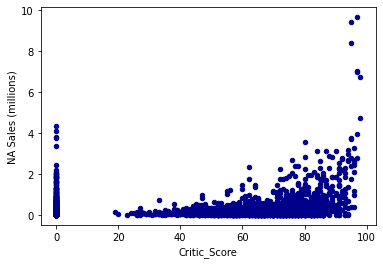

In [ ]:
# This is a scatter plot of the sales in North America

vg_action.plot.scatter(x='Critic_Score', y='NA_Sales', color='darkblue', ylabel='NA Sales (millions)')

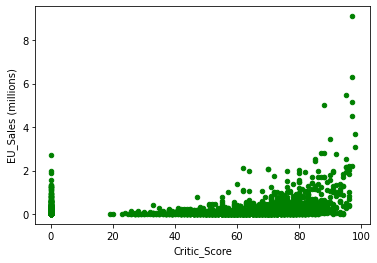

In [ ]:
# This is a scatter plot of the sales in the European Union for comparison vesus NA Sales

vg_action.plot.scatter(x='Critic_Score', y='EU_Sales', color='green', ylabel='EU_Sales (millions)')

The "Critic_Score" is based on a 0 to 100 number system. The "NA_Sales" and "EU_Sales" is based on units sold in the millions. 

## State the least squares line and the correlation coefficient.

The process of finding the parameters for which the sum of the squares of the residuals is minimal. Linear regression for two variables is based on a linear equation with one independent variable. 

y-hat = b0 + b1x

0.26083382789317217 =  b0 + 1.6537045892529527(37.36765578635015)

###Line of Best Fit or Least-Squares Line. has the form: y = a + bx

The best fit line always passes through the point (x-bar, y-bar). We can get x-bar by getting the mean from the "Critic Score". We get the y-bar from the mean of "NA Sales" 



In [ ]:
# Get the mean for X-bar. This will add up all 3,370 Critic Scores and then divide it 

vg_action['Critic_Score'].mean()

37.36765578635015

In [ ]:
# Get the mean for Y-bar. This will add up all 3,370 NA Sales and then divide it

vg_action['NA_Sales'].mean()

0.26083382789317217

In [ ]:
# Independent variable minus the mean (X - X-bar)

critic_mean = vg_action['Critic_Score'].mean()

meta_critic - critic_mean

16       59.632344
17       57.632344
23       59.632344
24       57.632344
38       59.632344
           ...    
16696    42.632344
16698   -37.367656
16699    29.632344
16703   -37.367656
16714   -37.367656
Name: Critic_Score, Length: 3370, dtype: float64

In [ ]:
# Assign (X - X-bar) a variable. The observation from X 

observed_x = meta_critic - critic_mean

In [ ]:
# Dependent variable minus the mean (Y - Y-bar)

naSales_mean = vg_action['NA_Sales'].mean()

na_sale - naSales_mean

16       6.759166
17       9.169166
23       9.399166
24       8.149166
38       6.729166
           ...   
16696   -0.260834
16698   -0.250834
16699   -0.250834
16703   -0.260834
16714   -0.260834
Name: NA_Sales, Length: 3370, dtype: float64

In [ ]:
# Assign (Y - Y-bar) a variable. The observation from Y

observerd_y = na_sale - naSales_mean

In [ ]:
# Square the observed X 
observed_x.apply(np.sqrt)

16       7.722198
17       7.591597
23       7.722198
24       7.591597
38       7.722198
           ...   
16696    6.529345
16698         NaN
16699    5.443560
16703         NaN
16714         NaN
Name: Critic_Score, Length: 3370, dtype: float64

In [ ]:
# Square the observed  Y
observerd_y.apply(np.sqrt)

16       2.599840
17       3.028063
23       3.065806
24       2.854674
38       2.594064
           ...   
16696         NaN
16698         NaN
16699         NaN
16703         NaN
16714         NaN
Name: NA_Sales, Length: 3370, dtype: float64

In [ ]:
# Now apply (X - X-bar) times (Y - Y-bar)

observed_x * observerd_y
ob_x_times_ob_y =  observed_x * observerd_y

In [ ]:
# Regression line is y-hat = b0 + b1x

sqrt_x = observed_x.apply(np.sqrt)
sqrt_y = observerd_y.apply(np.sqrt)

# To get the denominator for b1 sum up Sqaure root of observed_X
sum_sqrt_x = sqrt_x.sum()

# To get the numerator  for b1 sum up (X - X-bar) times (Y - Y-bar)
sum_ob_x_and_y = ob_x_times_ob_y.sum()

# B1 = numerator / denominator

b1 = sum_ob_x_and_y / sum_sqrt_x  # The slope
b1

1.6537045892529527

In [ ]:
# To get b0 . Where y value is equal to 0.26083382789317217 =  b0 + 1.6537045892529527(37.36765578635015)

1.6537045892529527*37.36765578635015

61.79506386351189

In [ ]:
# To get b0.   0.26083382789317217 =  b0 + 61.79506386351189

0.26083382789317217 - 61.79506386351189

-61.53423003561872

In [ ]:
b0 = -61.53423003561872

# Y-hat = 1.6537045892529527 + -61.53423003561872(X)

## On your scatter plot, in a different color, construct the least squares line. Is the correlation coefficient significant? Explain and show how you determined this.

In [ ]:
# Re-Assign variables to equal y=mx +b

x = vg_action['Critic_Score'] # X-Axis
y = vg_action['NA_Sales'] # Y-Axis
m, b = np.polyfit(x, y, 1)

In [ ]:
reshaped_meta_critic = meta_critic.values.reshape(-1, 1)
reshaped_na_sale = na_sale.values.reshape(-1, 1)
lr = LinearRegression()
lr.fit(reshaped_meta_critic, reshaped_na_sale)
y_pred = lr.predict(reshaped_na_sale)

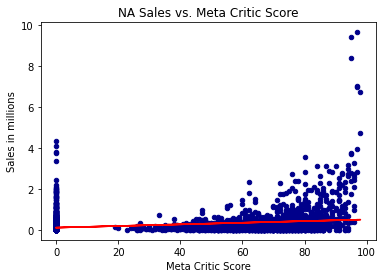

In [ ]:
# Show the least squares line as a red line

vg_action.plot.scatter(x='Critic_Score', y='NA_Sales', color='darkblue')
plt.title('NA Sales vs. Meta Critic Score')
plt.ylabel('Sales in millions')
plt.xlabel('Meta Critic Score')
plt.plot(x, m*x+b, color='red')

## Interpret the slope of the linear regression line in the context of the data in your project. Relate the explanation to your data, and quantify what the slope tells you.

It is a slight positive slope. Based on the data, I can conclude that there is NOT a significant linear relationship between NA Sales and Meta Critic scores.

## Does the regression line seem to fit the data? Why or why not? If the data does not seem to be linear, explain if any other model seems to fit the data better.

It looks like it fits but the problem is that there may be too many data points causing an "overfit" model. Therefore it can cause misleading information. Possiblely the best way to fit the data is to shrink the data to a smaller set. Also NA sales and Meta Critic Scores may not be the best selection to be applied.

## Are there any outliers? If so, what are they? Show your work in how you used the potential outlier formula in the Linear Regression and Correlation chapter (since you have bivariate data) to determine whether or not any pairs might be outliers.

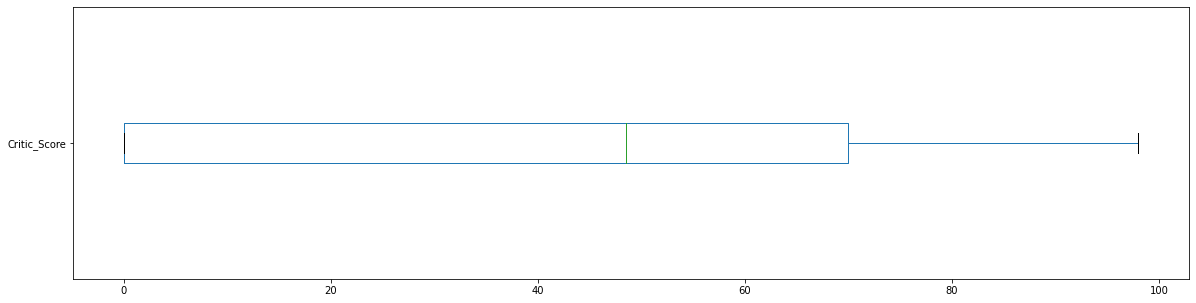

In [ ]:
 vg_action.boxplot(column='Critic_Score', grid=False, vert=False, figsize=(20,5)) 

In [ ]:
# To see if a data point is an outlier and check if it falls farther than three standard deviations, we calculate:
# Q1 – 1.5 x IQR
# Q3 + 1.5 x IQR

vg_action.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000
mean,1971.106825,0.260834,0.154045,0.047905,0.054777,0.517884,37.367656,15.580415,102.572107
std,269.958556,0.563271,0.403220,0.163997,0.236010,1.145299,34.740831,20.524343,410.676647
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
25%,2005.000000,0.010000,0.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000
50%,2009.000000,0.100000,0.030000,0.000000,0.010000,0.190000,48.500000,7.000000,6.000000
75%,2012.000000,0.260000,0.140000,0.030000,0.040000,0.490000,70.000000,26.000000,32.000000
max,2017.000000,9.660000,9.090000,3.960000,10.570000,21.040000,98.000000,106.000000,8003.000000


In [ ]:
# What is the IQR for Critic score 
#  Q3 - Q1 = IQR

70 - 0


70

In [ ]:
# Q1 – 1.5 x IQR

0 - 1.5 * 70

-105.0

In [ ]:
# Q3 + 1.5 x IQR

70 + 1.5 * 70

175.0

According to the Outlier formula any number in Critic Score  passed 175  is considered an outlier.Since there was too many points of data identifying outliers can be difficult to show.